# ZADANIE 1

### Wykonaj w Pythonie poniższy skrypt i przeanalizuj go

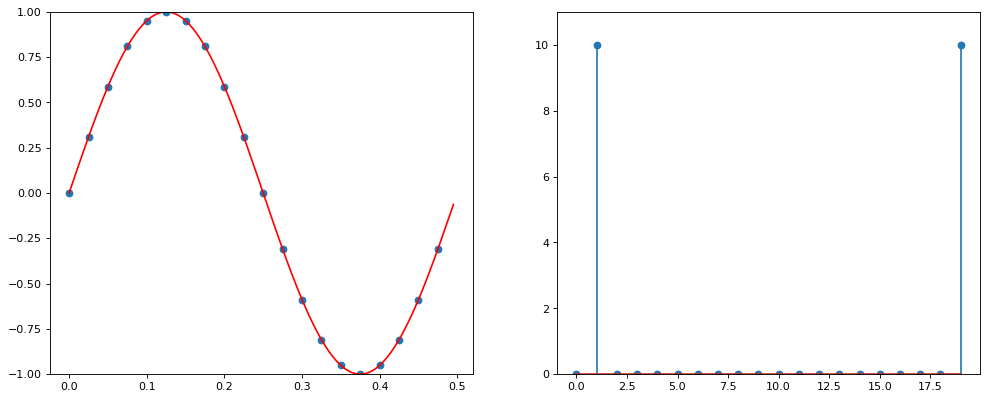

In [1]:
from pylab import *
from numpy import *
import math

from ipywidgets import *

#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 2.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : A * sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
w = 40       # Częstotliwość probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
n = len(t)                 # Liczba próbek

signal = f(t)   

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT
signal1 = fft.fft(signal)
signal1 = abs(signal1) # moduł

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

freqs = range(n)
stem(freqs, signal1, '-*', use_line_collection=True);

**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

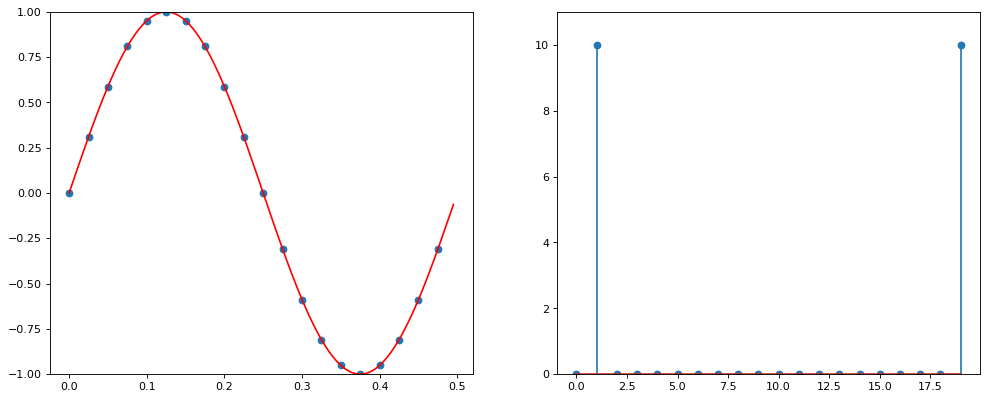

In [2]:
#Tutaj dla wygody możesz powyższy kod zawrzeć w postaci funkcji wielu parametrów

def signal(A = 1, F = 2.0, LP = 1, w = 40):
    #--- Definiujemy sygnal wejsciowy
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

    freqs = range(n)
    stem(freqs, signal1, '-*', use_line_collection=True);

signal()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [3]:
def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

### b) Zmień częstotliwość próbkowania na 50Hz.

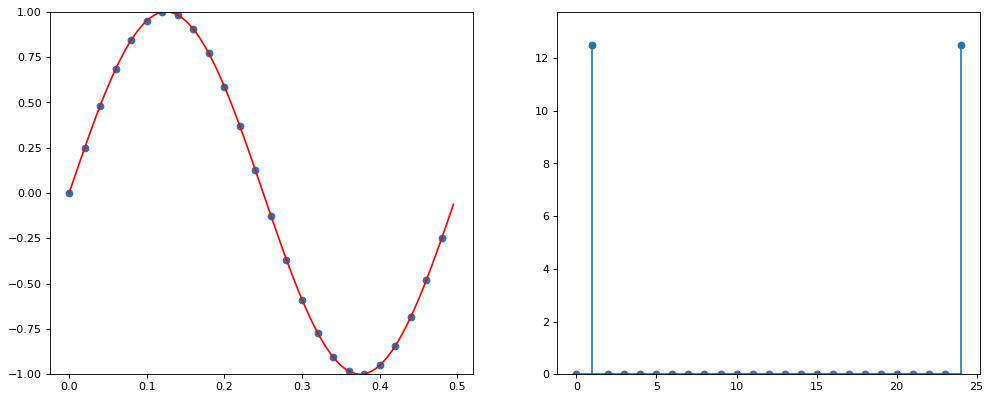

In [4]:
# w=50
signal(w = 50)

### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

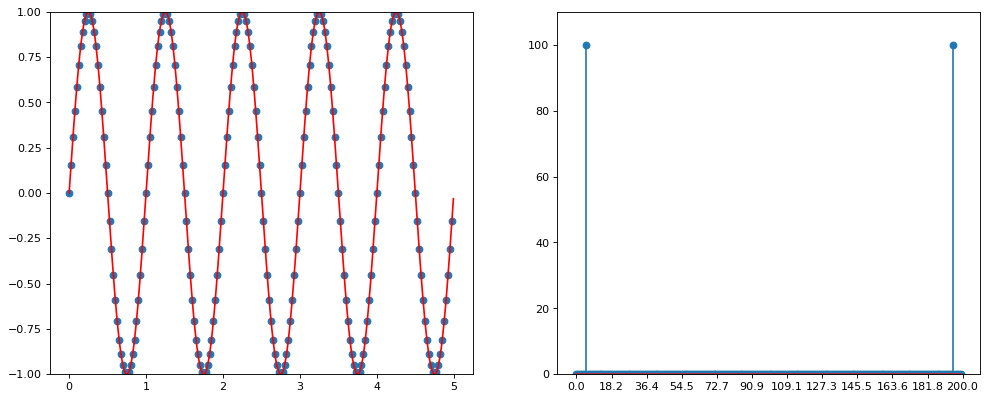

In [5]:
# popraw oś OX

def signal(A = 1, F = 2.0, LP = 1, w = 40):
    #--- Definiujemy sygnal wejsciowy
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_ylim([0.0, max(1.1*ymax, 3.0)])
    xticks(np.linspace(0, w/F*LP, min(12, math.floor(w/2))))

    freqs = range(n)
    stem(freqs, signal1, '-*', use_line_collection=True);

signal(F=1, LP=5)

### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

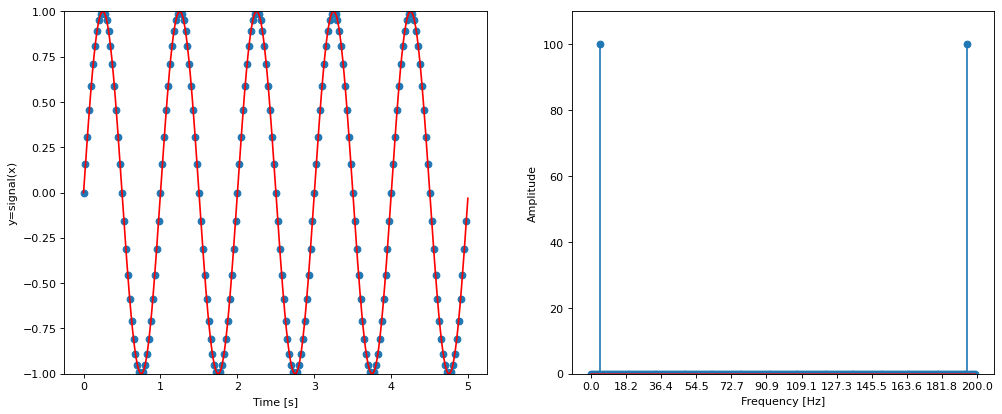

In [6]:
# Podpisz osie wykresów

def signal(A = 1, F = 2.0, LP = 1, w = 40):
    #--- Definiujemy sygnal wejsciowy
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    xlabel("Time [s]")
    ylabel("y=signal(x)")

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_ylim([0.0, max(1.1*ymax, 3.0)])
    xticks(np.linspace(0, w/F*LP, min(12, math.floor(w/2))))
    
    xlabel("Frequency [Hz]")
    ylabel("Amplitude")

    freqs = range(n)
    stem(freqs, signal1, '-*', use_line_collection=True);

signal(F=1, LP=5)

### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

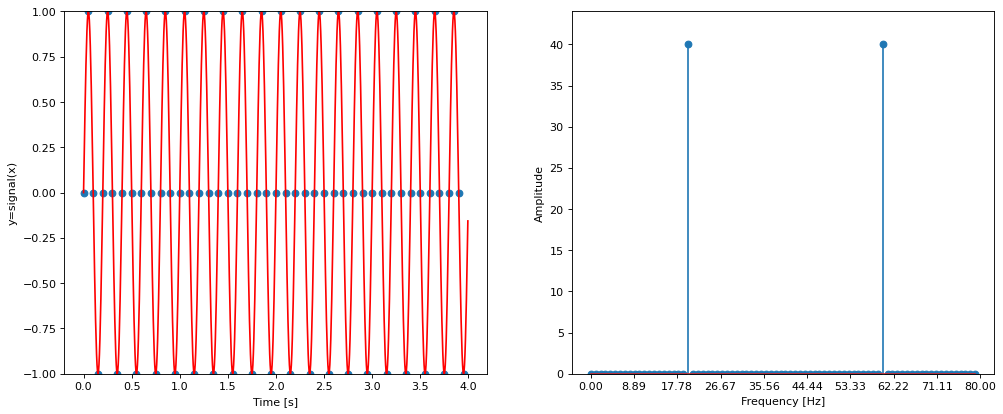

In [7]:
# F=5, w=20, LP=20

signal(F=5, w=20, LP=20)

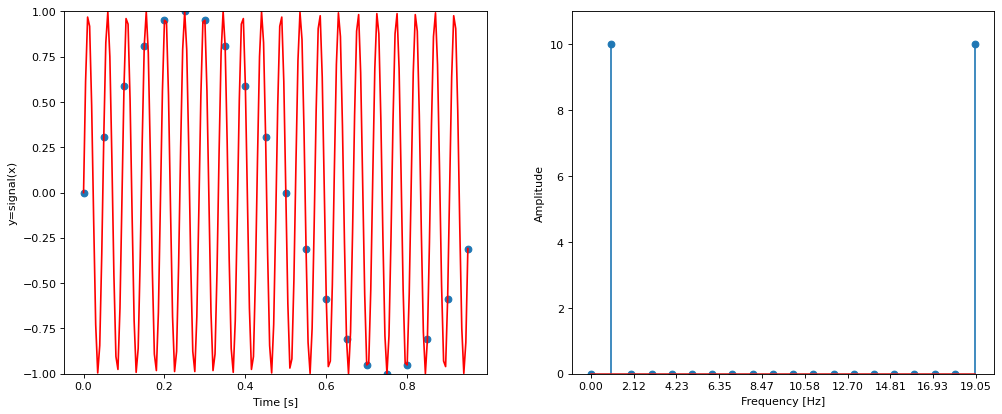

In [8]:
# F=21, w=20, LP=20

signal(F=21, w=20, LP=20)

#częstotliwości 1 Hz i 19 Hz

### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

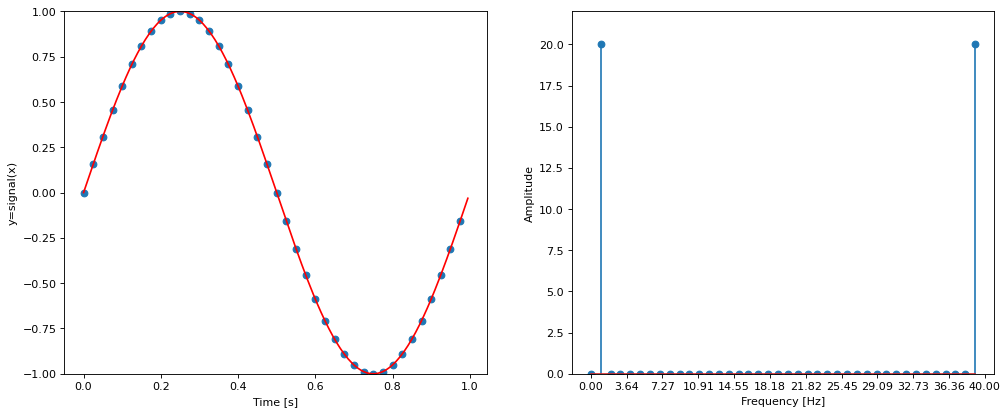

In [9]:
# F=1, A=1, LP=1

signal(F=1, A=1, LP=1)

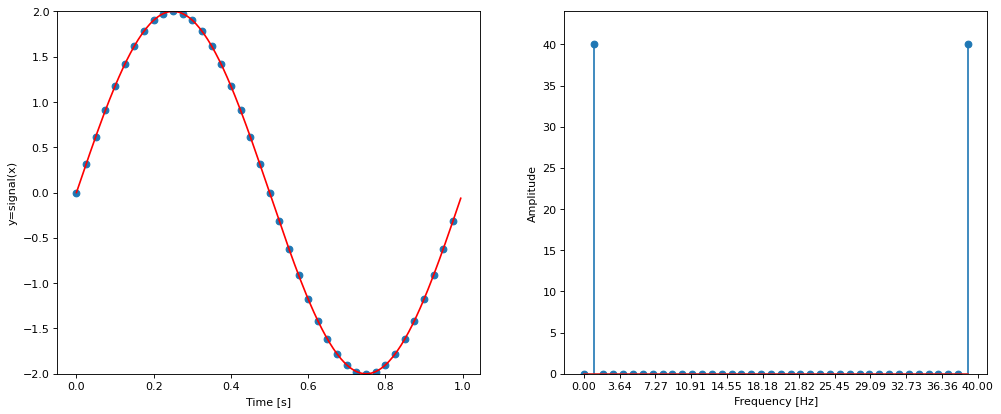

In [10]:
# F=1, A=2, LP=1

signal(F=1, A=2, LP=1)

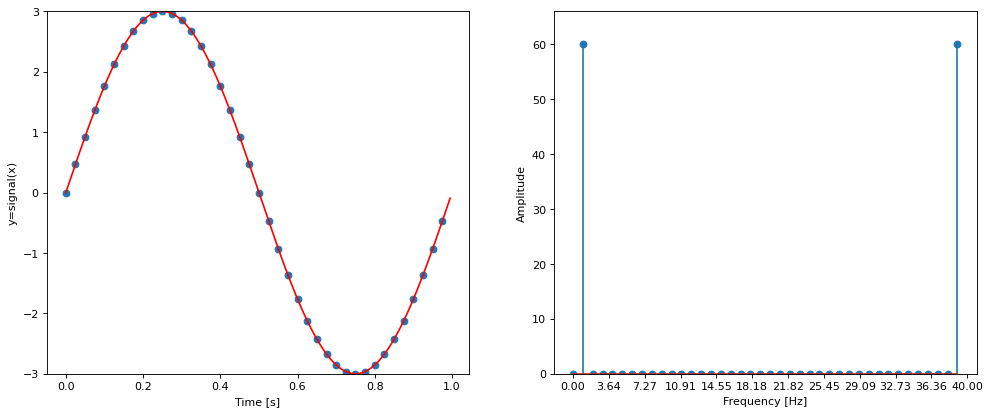

In [11]:
# F=1, A=3, LP=1

signal(F=1, A=3, LP=1)

# wartość na osi OY na wykresie spektrum zwiększa się

### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

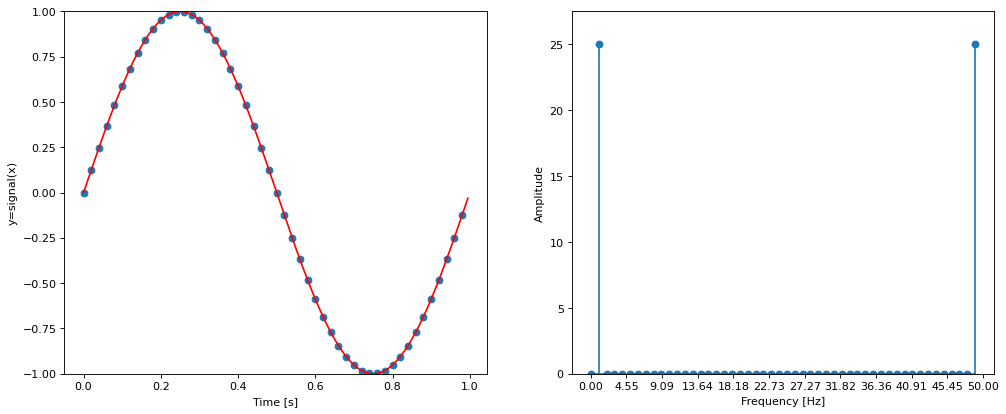

In [12]:
# F=1, w=50, LP=1

signal(F=1, w=50, LP=1)

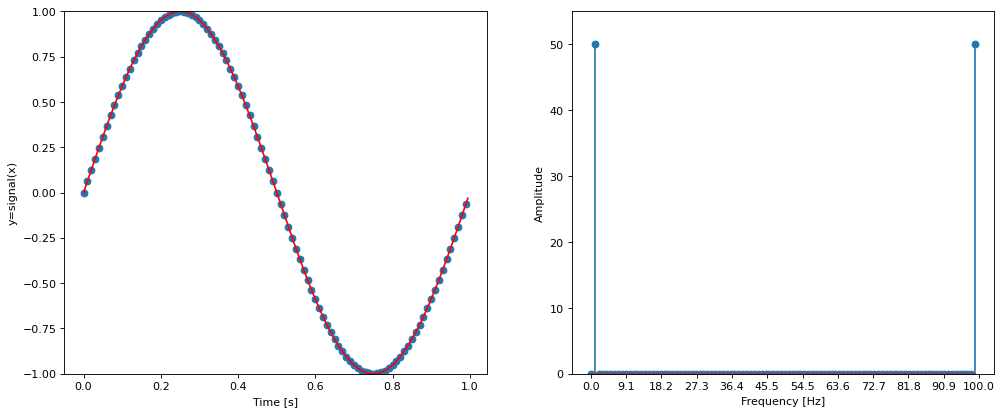

In [13]:
# F=1, w=100, LP=1

signal(F=1, w=100, LP=1)

### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

In [14]:
# popraw oś OY

import matplotlib.ticker as ticker

def signal(A = 1, F = 2.0, LP = 1, w = 40):
    #--- Definiujemy sygnal wejsciowy
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    xlabel("Time [s]")
    ylabel("y=signal(x)")

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_ylim([0.0, max(1.1*ymax, 3.0)])
    xticks(np.linspace(0, w/F*LP, min(12, math.floor(w/2))))
    
    scale_y = 1/LP/w*F*2
    ticks_y = ticker.FuncFormatter(lambda y, pos: f'{y*scale_y}')
    ax.yaxis.set_major_formatter(ticks_y)
    
    xlabel("Frequency [Hz]")
    ylabel("Amplitude")

    freqs = range(n)
    stem(freqs, signal1, '-*', use_line_collection=True);


interact(signal, w=(20,50,10), LP=(1,5,1), F=(1, 3, 1), A=(1, 3, 1))

interactive(children=(IntSlider(value=1, description='A', max=3, min=1), IntSlider(value=2, description='F', m…

<function __main__.signal(A=1, F=2.0, LP=1, w=40)>

# Zadanie 2

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

a) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(F*2\pi t)$, $F=10Hz$

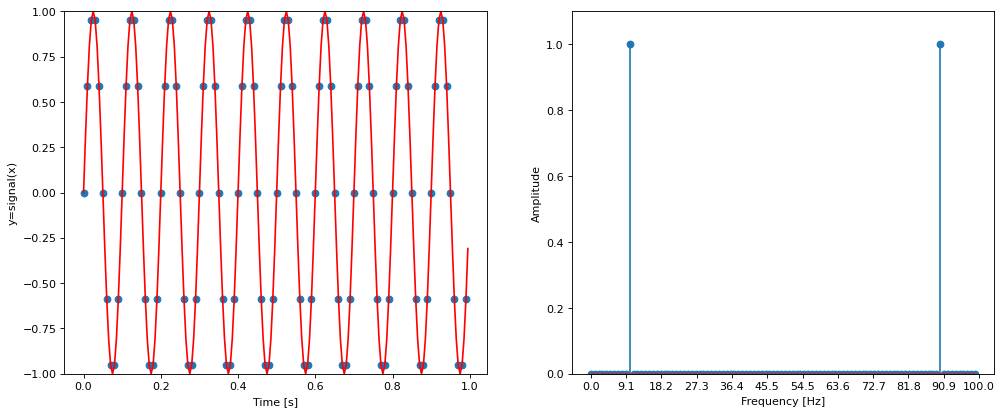

In [15]:
# f=10, w=100, A=1, LP=10

signal(F=10, w=100, A=1, LP=10)

ii) $sin(F*2\pi t)$, $F=20Hz$

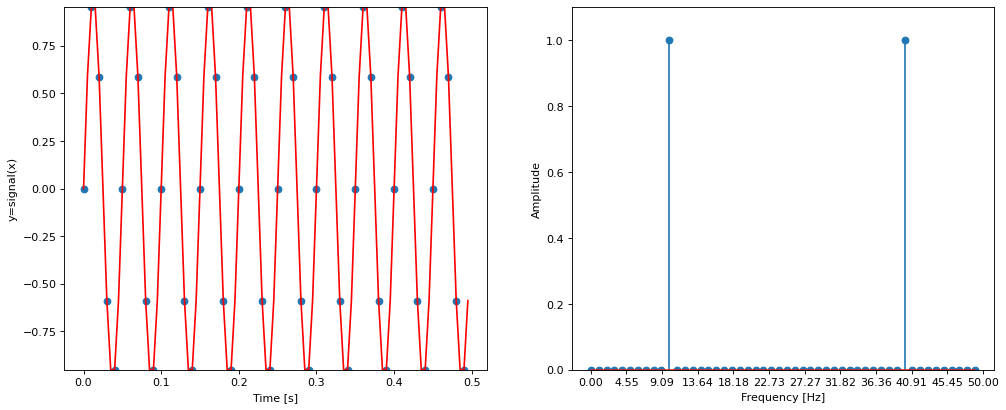

In [16]:
# f=20, w=100, A=1, LP=10

signal(F=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$

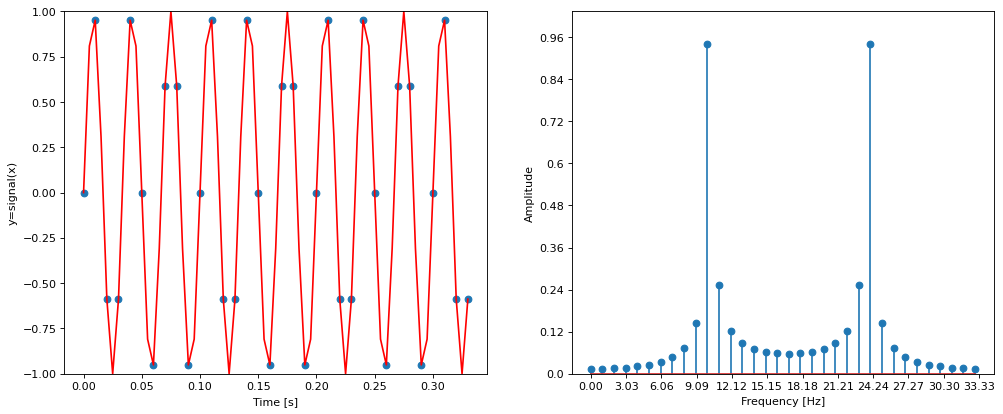

In [17]:
# f=30, w=100, A=1, LP=10

signal(F=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

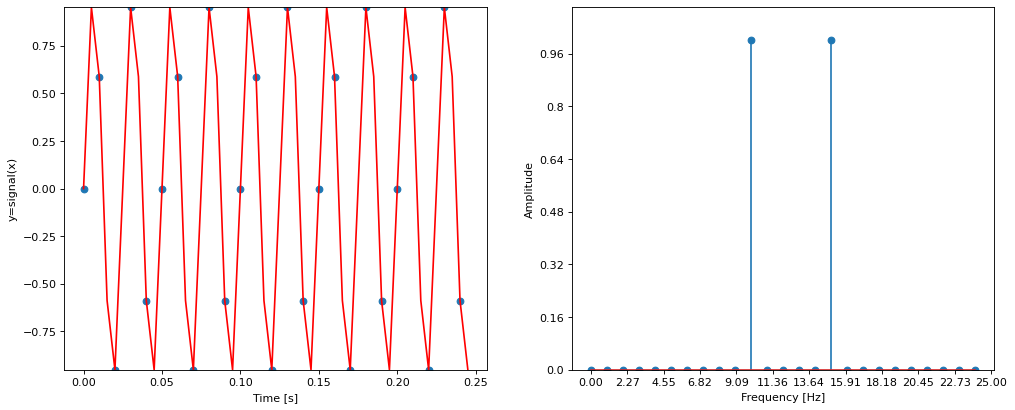

In [18]:
# f=40, w=100, A=1, LP=10

signal(F=40, w=100, A=1, LP=10)

### b) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

In [19]:
# Twierdzenie o próbkowaniu, twierdzenie Nyquista–Shannona

### c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

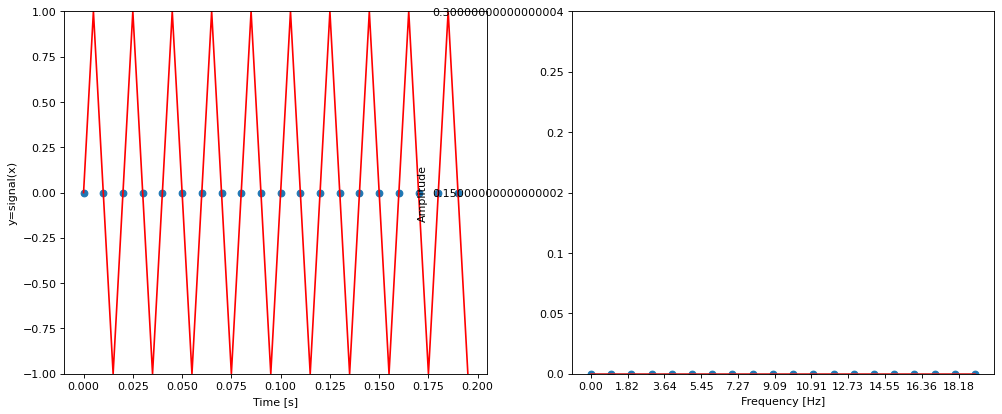

In [20]:
# f=50, w=100, A=1, LP=10

signal(F=50, w=100, A=1, LP=10)

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Jeżeli stworzyłeś/aś na początku funkcję odpowiedzialną za rysowanie sygnału i FFT, możesz ją zmodyfikować tak, by jako jej argument podawać funkcję lambda, realizującą sygnał.

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

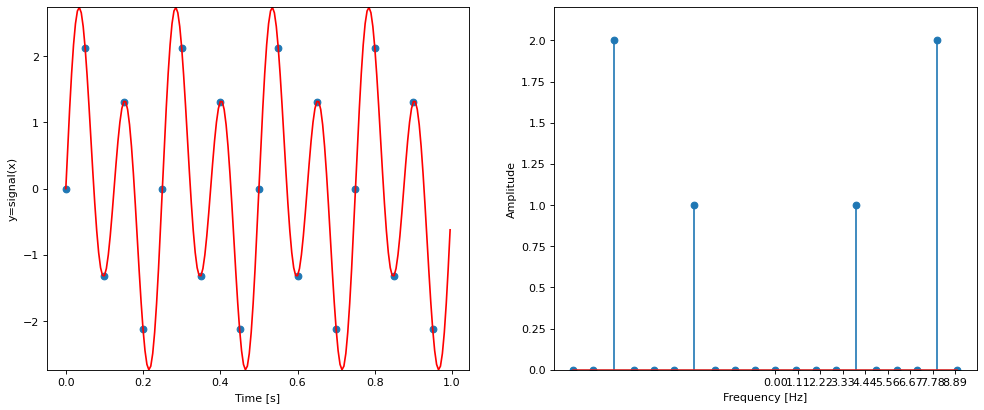

In [87]:
def signal2(f, T, LP=1, w=40):
    f_signal = lambda t: np.sin(2 * np.pi * t * f) + 2 * np.sin(4 * np.pi * t * f)

    TW = 1 / w 
    t = np.arange(0, LP * T, TW)
    n = len(t) 

    signal = f_signal(t)

    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = f_signal(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    xlabel("Time [s]")
    ylabel("y=signal(x)")

    signal1 = fft.fft(signal)
    signal1 = abs(signal1)

    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    xticks(np.linspace(0, w / (2 * T), min(12, math.floor(w / 2))))

    scale_y = 1 / LP / w * (1 / T) * 2
    ticks_y = ticker.FuncFormatter(lambda y, pos: f'{y * scale_y}')
    ax.yaxis.set_major_formatter(ticks_y)

    xlabel("Frequency [Hz]")
    ylabel("Amplitude")

    freqs = np.fft.fftfreq(n, TW)
    stem(freqs, signal1, '-*', use_line_collection=True)

    plt.show()


signal2(f=4, T=1, w=20)


### c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.1, 0.3], częstotliwosci: [2.0, 4.0] oraz modyfikacje fazy[0 + math.pi]. Jeżli utworzyłeś/aś funkcje lambda wcześniej, śmiało możesz ją podmienić na 'zwyczajną funkcję', która będzie realizować sumowanie losowych sinusów. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*2*pi*t))? (Jeżeli wykorzystujesz podany na początku kod, to nie przejmuj się, że pełen sygnał i sprókowany sobie nie odpowiadają. Każdy jest inny - bo losowy). 

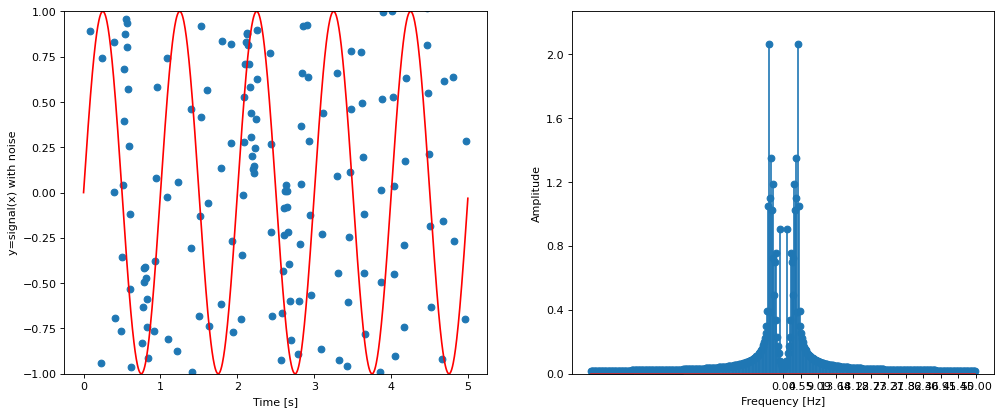

In [88]:
def signal2_with_noise(f, T, LP=1, w=40):
    # funkcja sygnału z szumem
    def signal_with_noise(t):
        # sygnał podstawowy
        signal = np.sin(2 * np.pi * t * f)
        
        # losowych sinusy jako szum
        for _ in range(100):
            A = np.random.uniform(0.1, 0.3)
            freq = np.random.uniform(2.0, 4.0)
            phase = np.random.uniform(0, np.pi)
            signal += A * np.sin(2 * np.pi * freq * t + phase)
        
        return signal

    TW = 1 / w
    t = np.arange(0, LP * T, TW)
    signal = signal_with_noise(t)
    # sygnał z szumem
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')
    # sygnał bez szumu
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = np.sin(2 * np.pi * base_t * f)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    xlabel("Time [s]")
    ylabel("y=signal(x) with noise")

    signal_fft = np.fft.fft(signal)
    signal_fft = np.abs(signal_fft)

    ax = fig.add_subplot(122)
    ymax = max(signal_fft)
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    xticks(np.linspace(0, w / (2 * T), min(12, math.floor(w / 2))))

    scale_y = 1 / LP / w * (1 / T) * 2
    ticks_y = ticker.FuncFormatter(lambda y, pos: f'{y * scale_y}')
    ax.yaxis.set_major_formatter(ticks_y)

    xlabel("Frequency [Hz]")
    ylabel("Amplitude")

    freqs = np.fft.fftfreq(len(t), TW)
    stem(freqs, signal_fft, '-*', use_line_collection=True)

    plt.show()

signal2_with_noise(f=1, T=1, w=100, LP=5)


### d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz, LP=10. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

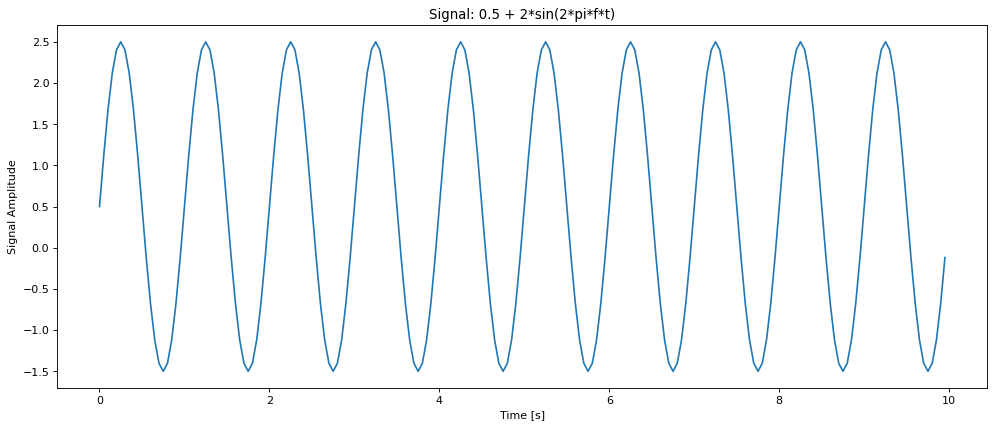

In [89]:
# Wyrysuj sygnał

def signal3(f, T, LP=1, w=40):
    f_signal = lambda t: 0.5 + 2 * np.sin(2 * np.pi * t * f)

    TW = 1 / w 
    t = np.arange(0, LP * T, TW)
    n = len(t) 

    signal = f_signal(t)

    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(111)
    ax.plot(t, signal)

    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Signal Amplitude")
    ax.set_title("Signal: 0.5 + 2*sin(2*pi*f*t)")

    plt.show()

signal3(f=1, T=1, w=20, LP=10)


### e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal).

In [92]:
#  faza = 0

In [25]:
# faza = pi/4

# Zadanie 4

### Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona? (Uwaga: natkniesz się na problemy numeryczne – rozwiąż je).

In [78]:
# wygeneruj wektor x
x = np.random.random(10)
print("Wektor x:", x)

Wektor x: [0.38850196 0.12237837 0.17891762 0.66807155 0.83329781 0.23516885
 0.49778988 0.48383202 0.99702019 0.96807631]


In [79]:
# oblicz fft z x
fft_x = np.fft.fft(x)
print("FFT z x:", fft_x)

FFT z x: [ 5.37305456+0.00000000e+00j -0.0339161 +9.02721733e-01j
 -0.51129468+1.71255545e+00j  0.20824869+1.12644178e-01j
 -0.61605557-2.58988605e-01j  0.41800035+2.77555756e-17j
 -0.61605557+2.58988605e-01j  0.20824869-1.12644178e-01j
 -0.51129468-1.71255545e+00j -0.0339161 -9.02721733e-01j]


In [80]:
# oblicz ifft z x
ifft_x = np.fft.ifft(fft_x)
print("IFFT z x:", ifft_x)

IFFT z x: [0.38850196+2.77555756e-18j 0.12237837-2.49800181e-17j
 0.17891762+2.77555756e-18j 0.66807155-4.35768899e-18j
 0.83329781+2.77555756e-18j 0.23516885+1.84510919e-17j
 0.49778988+2.77555756e-18j 0.48383202+1.19253647e-17j
 0.99702019+2.77555756e-18j 0.96807631-1.49165374e-17j]


In [90]:
d = np.max(np.abs(x - ifft_x))
print("Różnica między x a IFFT(FFT(x)):", d)

Różnica między x a IFFT(FFT(x)): 2.225450733329612e-16
